In [6]:
import numpy as np
from sklearn.random_projection import GaussianRandomProjection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn.model_selection import train_test_split
import sys
sys.path.append('../')
from Util import loadBeerRaw,loadWine,runNNs
from sklearn.preprocessing import LabelEncoder


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
X_train, X_test, y_train, y_test= loadBeerRaw()
encoder = LabelEncoder()
X_train['SugarScale'] = encoder.fit_transform(X_train['SugarScale']).astype(np.int32)


In [8]:
transformer = GaussianRandomProjection(n_components=3)
rpComponents = transformer.fit_transform(X_train[['OG','FG','ABV','IBU','Color','BoilSize','BoilTime','Efficiency','SugarScale','StyleID']])

In [9]:
rpDf = pd.DataFrame(data = rpComponents
             , columns = ['RP component 1', 'RP component 2','RP component 3'])

In [10]:
finalDf = pd.concat([rpDf, y_train], axis = 1)
finalDf.head()

,RP component 1,RP component 2,RP component 3,Style
0,-19.548336,90.929888,71.289735,NaN
1,-9.471185,108.043452,28.923887,Cream Ale
2,27.756860,107.318677,28.512282,Holiday/Winter Special Spiced Beer
3,22.867766,119.573170,26.482122,American IPA
4,-11.523865,149.183145,14.857106,NaN


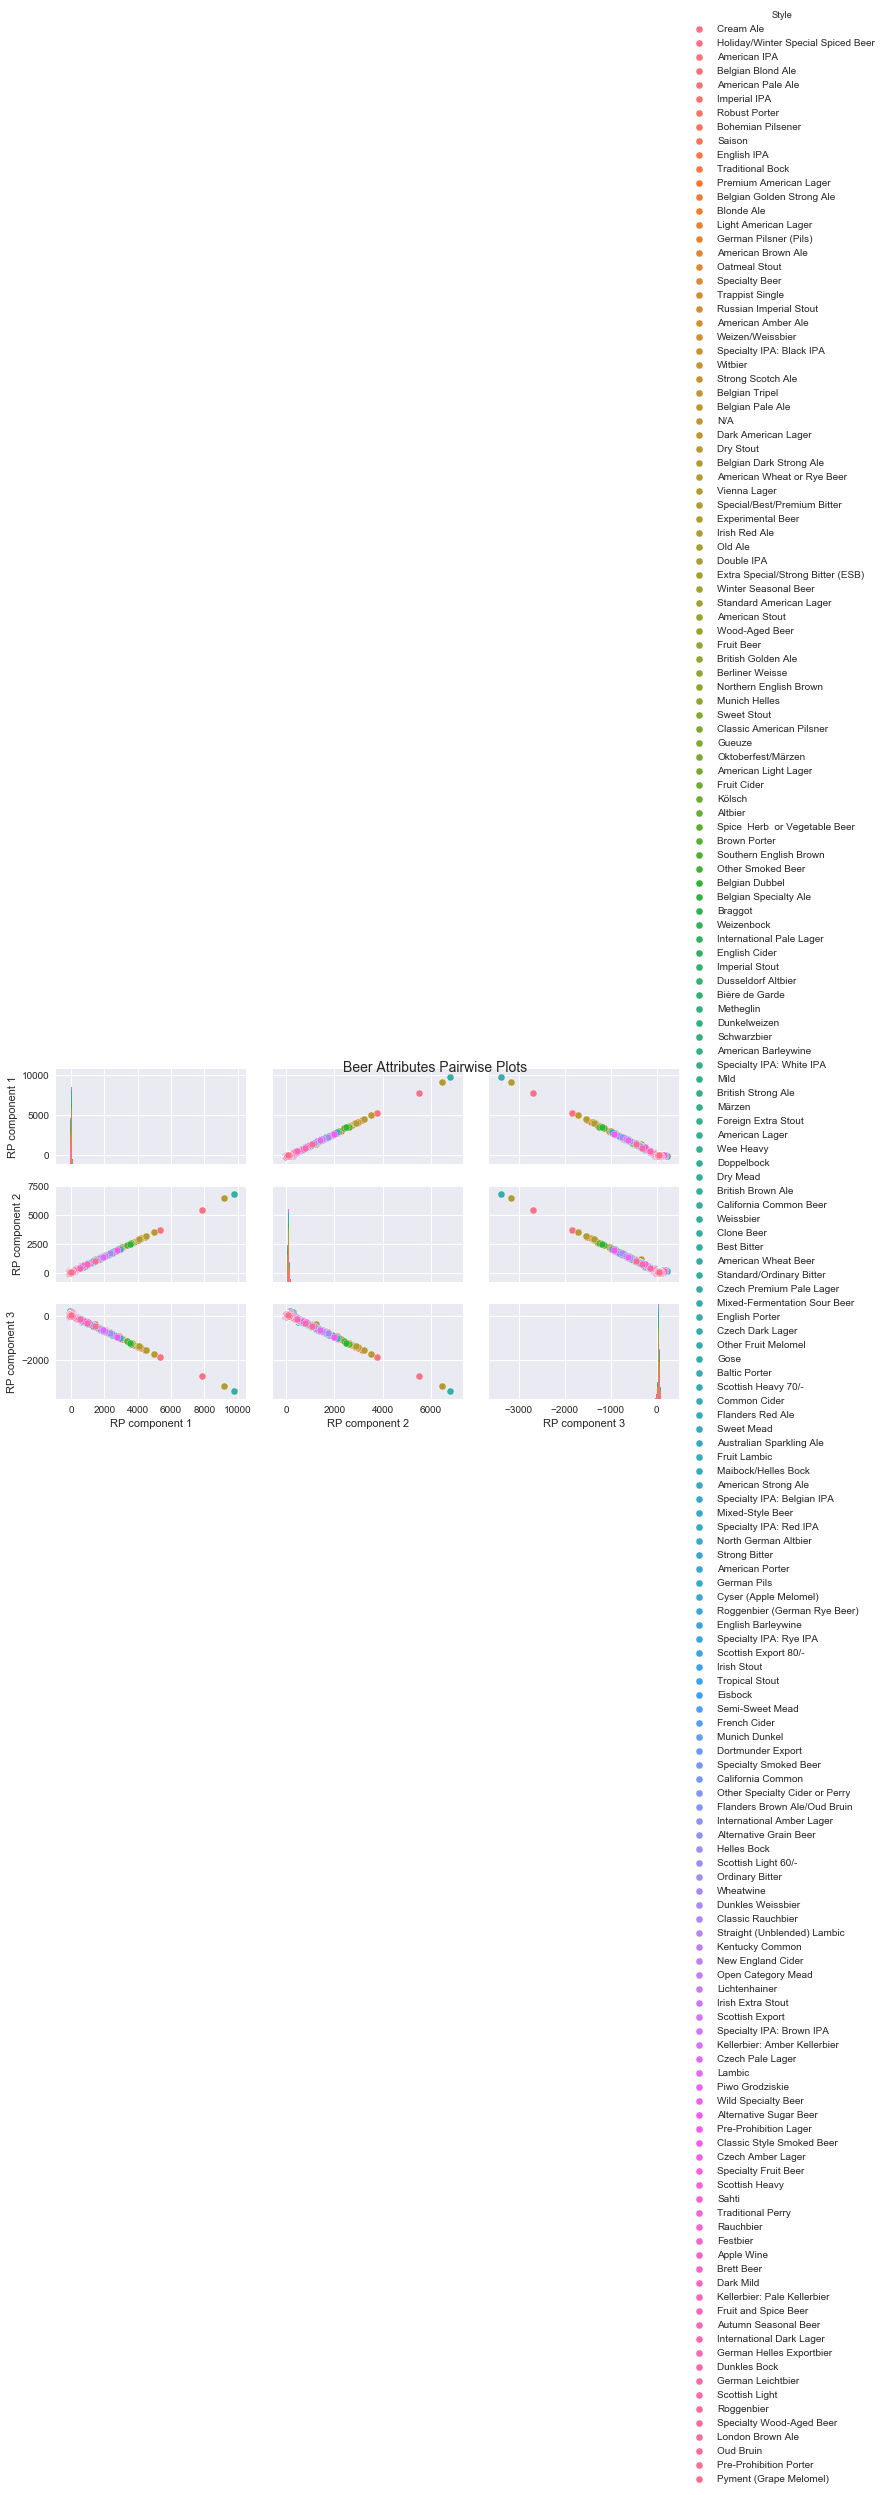

In [11]:
pp = sns.pairplot(finalDf, hue='Style', size=1.8, aspect=1.8)
fig = pp.fig 
t = fig.suptitle('Beer Attributes Pairwise Plots', fontsize=14)

C:\ProgramData\Anaconda3\lib\site-packages\nolearn\lasagne\base.py:370: UserWarning: The 'eval_size' argument has been deprecated, please use the 'train_split' parameter instead, e.g.
train_split=TrainSplit(eval_size=0.4)
  warn("The 'eval_size' argument has been deprecated, please use "
C:\ProgramData\Anaconda3\lib\site-packages\nolearn\lasagne\base.py:370: UserWarning: The 'eval_size' argument has been deprecated, please use the 'train_split' parameter instead, e.g.
train_split=TrainSplit(eval_size=0.4)
  warn("The 'eval_size' argument has been deprecated, please use "


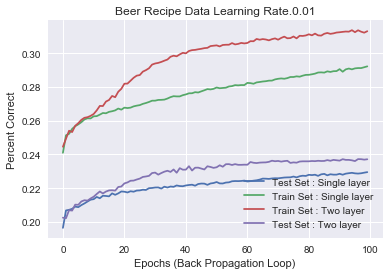

In [13]:
X_train, X_test, y_train, y_test= loadBeerRaw()
encoder = LabelEncoder()
X_train['SugarScale'] = encoder.fit_transform(X_train['SugarScale']).astype(np.int32)
X_train=X_train[['OG','FG','ABV','IBU','Color','BoilSize','BoilTime','Efficiency','SugarScale','StyleID']]
X_test['SugarScale'] = encoder.fit_transform(X_test['SugarScale']).astype(np.int32)
X_test=X_test[['OG','FG','ABV','IBU','Color','BoilSize','BoilTime','Efficiency','SugarScale','StyleID']]
transformer = GaussianRandomProjection(n_components=3)
transformer.fit(X_train)
rpComponents = transformer.transform(X_train)
X_train = pd.DataFrame(data = rpComponents,index=X_train.index
             , columns = ['RP component 1', 'RP component 2','RP component 3'])
rpComponents = transformer.transform(X_test)
X_test = pd.DataFrame(data = rpComponents,index=X_test.index
             , columns = ['RP component 1', 'RP component 2','RP component 3'])


y_test =encoder.fit_transform(y_test).astype(np.int32)
y_train=encoder.fit_transform(y_train).astype(np.int32)
num_features = X_train.shape[1]
num_classes = len(encoder.classes_)

learningRates=[.01]
for i in learningRates:
    runNNs(X_train, X_test, y_train, y_test,num_classes,num_features,"Beer Recipe Data Learning Rate.",100,i)

C:\ProgramData\Anaconda3\lib\site-packages\nolearn\lasagne\base.py:370: UserWarning: The 'eval_size' argument has been deprecated, please use the 'train_split' parameter instead, e.g.
train_split=TrainSplit(eval_size=0.4)
  warn("The 'eval_size' argument has been deprecated, please use "
C:\ProgramData\Anaconda3\lib\site-packages\nolearn\lasagne\base.py:370: UserWarning: The 'eval_size' argument has been deprecated, please use the 'train_split' parameter instead, e.g.
train_split=TrainSplit(eval_size=0.4)
  warn("The 'eval_size' argument has been deprecated, please use "


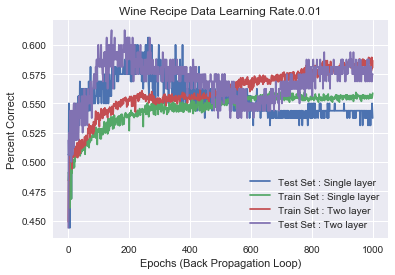

In [15]:
X_train, X_test, y_train, y_test= loadWine()

transformer = GaussianRandomProjection(n_components=3)
transformer.fit(X_train)
rpComponents = transformer.transform(X_train)
X_train = pd.DataFrame(data = rpComponents,index=X_train.index
             , columns = ['RP component 1', 'RP component 2','RP component 3'])
rpComponents = transformer.transform(X_test)
X_test = pd.DataFrame(data = rpComponents,index=X_test.index
             , columns = ['RP component 1', 'RP component 2','RP component 3'])


y_test =encoder.fit_transform(y_test).astype(np.int32)
y_train=encoder.fit_transform(y_train).astype(np.int32)
num_features = X_train.shape[1]
num_classes = 10

learningRates=[.01]
for i in learningRates:
    runNNs(X_train, X_test, y_train, y_test,num_classes,num_features,"Wine Recipe Data Learning Rate.",1000,i)